#Explore Data




In [ ]:
import pandas as pd


In [14]:
all_tweets = pd.read_json('random_tweets.json', lines=True)


In [16]:
print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])
print(all_tweets.loc[0]['user']['location'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
Waterloo, Iowa


#Defining Viral Tweets


In [17]:
import numpy as np
median_retweets = all_tweets['retweet_count'].median()
print(median_retweets)

13.0


In [19]:
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweets, 1, 0)
print(all_tweets['is_viral'].value_counts())

0    5562
1    5537
Name: is_viral, dtype: int64


#Making Features


In [23]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)


In [24]:
labels = all_tweets['is_viral']
labels

0        0
1        0
2        0
3        1
4        0
        ..
11094    1
11095    1
11096    0
11097    0
11098    0
Name: is_viral, Length: 11099, dtype: int64

In [25]:
data = all_tweets[['tweet_length','followers_count','friends_count']]
data

,tweet_length,followers_count,friends_count
0,140,215,335
1,77,199,203
2,140,196,558
3,140,3313,2272
4,140,125,273
...,...,...,...
11094,140,509,1323
11095,75,462,1033
11096,140,135,90
11097,140,59,320


#Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data)
data_scaled

array([[ 0.6164054 , -0.02878298, -0.14483305],
       [-1.64577622, -0.02886246, -0.16209787],
       [ 0.6164054 , -0.02887736, -0.11566596],
       ...,
       [ 0.6164054 , -0.02918038, -0.1768776 ],
       [ 0.6164054 , -0.02955792, -0.14679496],
       [-1.71759151, -0.02208668,  0.0333085 ]])

#Creating the Training Set and Test Set


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_scaled, labels, test_size = 0.2, random_state = 1)

#Using the Classifier


In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)
print(classifier.score(x_test, y_test))
print(classifier.score(x_train, y_train))

0.5882882882882883
0.7277846604347337


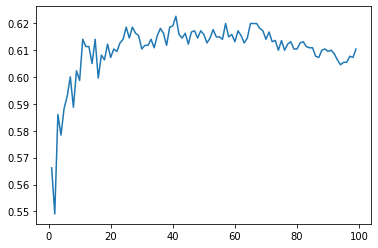

In [52]:
import matplotlib.pyplot as plt
scores = []
for i in range(1, 100):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(x_train, y_train)
  scores.append(classifier.score(x_test, y_test))

plt.plot(range(1,100), scores)
plt.show()

In [53]:
print(scores.index(max(scores)))

40


#After Tuning

In [54]:
tuned_model = KNeighborsClassifier(n_neighbors = scores.index(max(scores)))
tuned_model.fit(x_train, y_train)
print(tuned_model.score(x_test, y_test))

0.6189189189189189
